# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('12.5 Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [3]:
def calc_out_bounds(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    bounds = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    return bounds

In [4]:
### YOUR CODE HERE ###
df.shape

(200, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500000,57.879185,1.0,50.75,100.5,150.25,200.0
Age,180.0,39.894444,16.842848,18.0,29.00,36.0,49.00,135.0
Annual Income (k$),180.0,5615.433333,74531.115872,15.0,42.00,61.0,78.00,1000000.0
Spending Score (1-100),200.0,50.200000,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.Genre.value_counts(dropna=False)

Genre
Female     102
Male        77
NaN         19
Feemale      2
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [8]:
df[df.isna().sum(axis=1)>1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,NaN,NaN,81
46,47,Female,NaN,NaN,55
54,55,NaN,50.0,NaN,45
106,107,NaN,NaN,63.0,50
123,124,NaN,39.0,NaN,91


<Axes: xlabel='Age', ylabel='Count'>

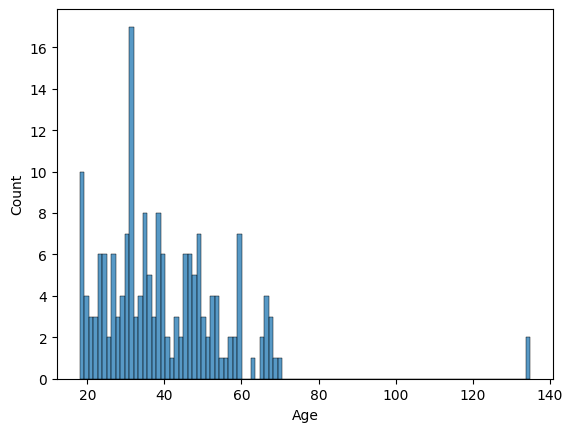

In [9]:
sns.histplot(df.Age, bins=100)

<Axes: >

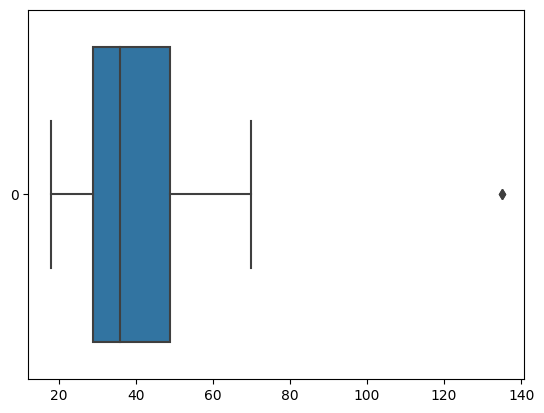

In [10]:
sns.boxplot(df.Age, orient='horizontal')
# возраст превышающий максимальную длительность жизни, явно ошибка

<Axes: >

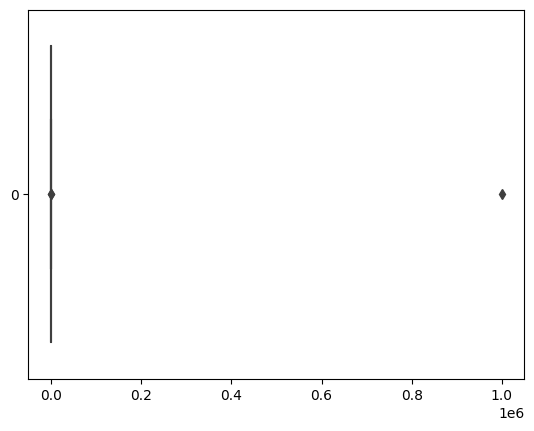

In [11]:
sns.boxplot(df['Annual Income (k$)'], orient='horizontal')
# вообще какой-то выброс (возможно ошибка в единице измерения)

<Axes: >

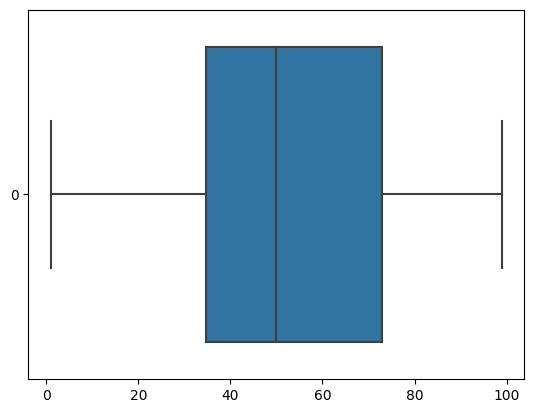

In [12]:
sns.boxplot(df['Spending Score (1-100)'], orient='horizontal')
# нет выбросов

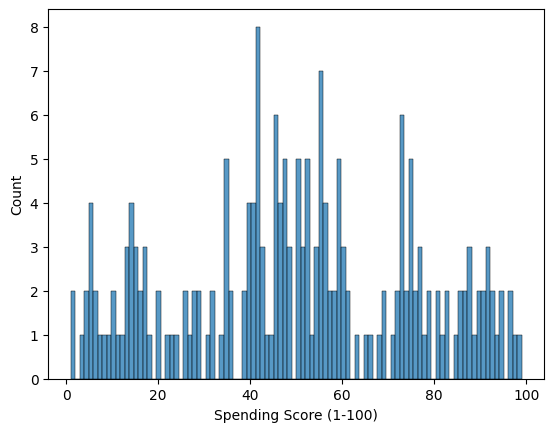

In [13]:
sns.histplot(df['Spending Score (1-100)'], bins=100)
plt.show()

In [14]:
age_bounds = calc_out_bounds(df.Age)
age_bounds

(-1.0, 79.0)

In [15]:
# удаляем выбросы по возрасту
# по идее в возрасте можно и вручную задать границы, например, от 14 до 100
df = df[(df.Age>age_bounds[0])&(df.Age<=age_bounds[1])]

In [16]:
income_bounds = calc_out_bounds(df['Annual Income (k$)'])
income_bounds

(-7.625, 129.375)

In [17]:
# по доходу левую границу можно задать нулем
df = df[(df['Annual Income (k$)']>income_bounds[0])&(df['Annual Income (k$)']<=income_bounds[1])]

In [18]:
df.Genre.value_counts(dropna=False)

Genre
Female     85
Male       57
NaN        14
Feemale     2
Name: count, dtype: int64

In [19]:
df.loc[df.Genre=='Feemale', 'Genre'] = 'Female'

In [20]:
df.Genre.value_counts(dropna=False)

Genre
Female    87
Male      57
NaN       14
Name: count, dtype: int64

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [21]:
### YOUR CODE HERE ###
RS = 1
train, test = train_test_split(df, test_size=0.2, random_state=RS)
train

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
170,171,NaN,40.0,87.0,13
60,61,Male,70.0,46.0,56
160,161,Female,56.0,79.0,35
109,110,Male,66.0,63.0,48
99,100,Male,20.0,61.0,49
...,...,...,...,...,...
168,169,Female,36.0,87.0,27
172,173,Male,36.0,87.0,10
94,95,Female,32.0,60.0,42
175,176,Female,30.0,88.0,86


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [22]:
### YOUR CODE HERE ###
from sklearn.impute import SimpleImputer

# заполним пустой признак пол значением неизвестно, т.к. тут может быть любой пол, в т.ч. и средний
imp_const_unknown = SimpleImputer(strategy='constant', fill_value='unknown')
# категориальный признак только пол
unk_cols = ['Genre']
train[unk_cols] = imp_const_unknown.fit_transform(train[unk_cols])

# Возраст и доход будем заполнять медианой (т.к. медиана более устоййчива к выбросам)
imp_median = SimpleImputer(strategy='median')
med_cols = ['Age', 'Annual Income (k$)']
train[med_cols] = imp_median.fit_transform(train[med_cols])

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


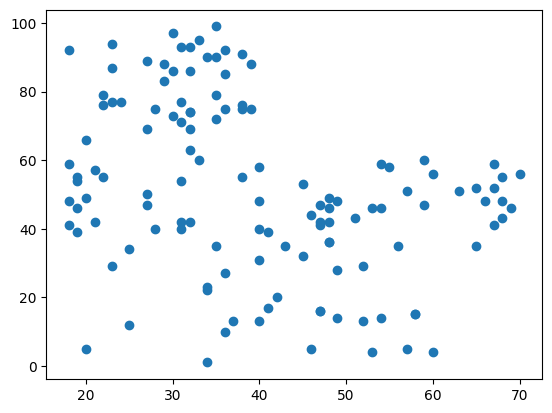

In [23]:
### YOUR CODE HERE ###
plt.scatter(train['Age'], train['Spending Score (1-100)'])

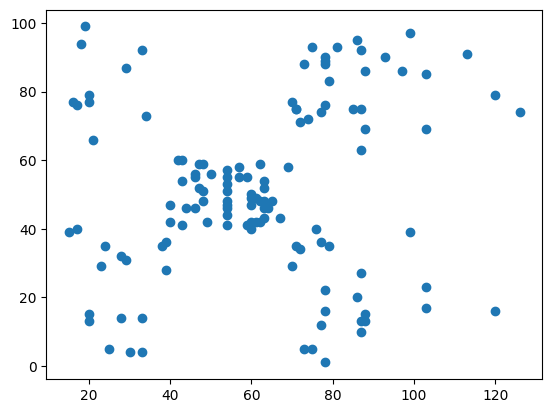

In [24]:
plt.scatter(train['Annual Income (k$)'], train['Spending Score (1-100)'])

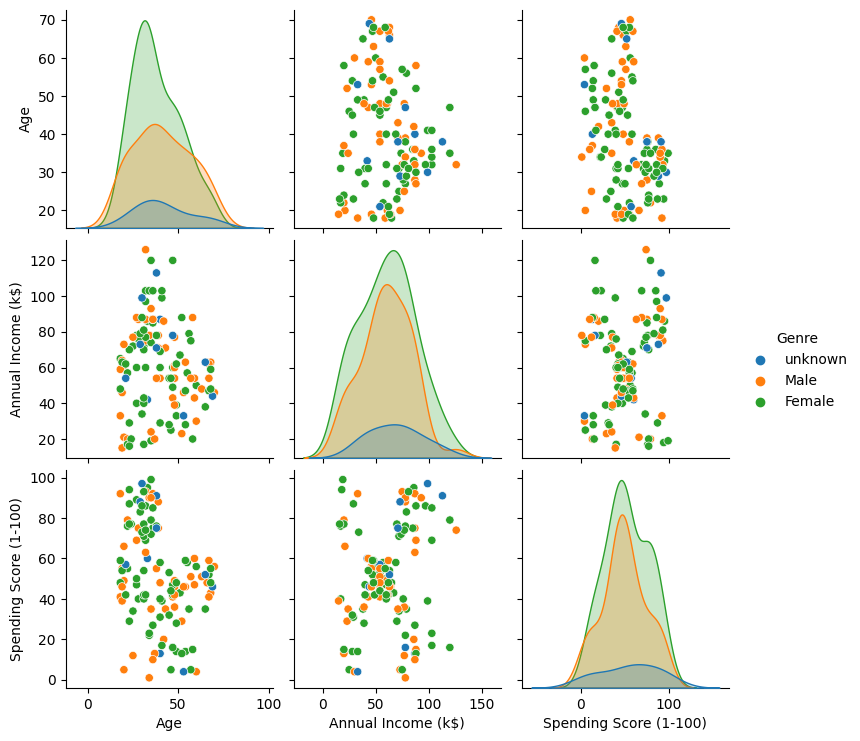

In [25]:
sns.pairplot(train.drop(columns='CustomerID'), hue='Genre')

In [26]:
# явных выбросов уже не осталось

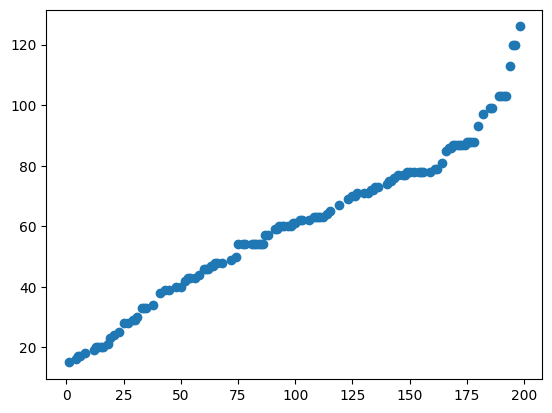

In [27]:
# замечен артефакт назначения ID ))
plt.scatter(train['CustomerID'], train['Annual Income (k$)'])

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [28]:
### YOUR CODE HERE ###
# величина дохода не имеет ограниченных границ, поэтому предпочтительнее использовать Standard нормализацию
# поскольку возраст имеет ограниченные рамки, можно использовать MinMax нормализацию
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [29]:
train.index = range(train.shape[0])

In [30]:
train

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,171,unknown,40.0,87.0,13
1,61,Male,70.0,46.0,56
2,161,Female,56.0,79.0,35
3,110,Male,66.0,63.0,48
4,100,Male,20.0,61.0,49
...,...,...,...,...,...
121,169,Female,36.0,87.0,27
122,173,Male,36.0,87.0,10
123,95,Female,32.0,60.0,42
124,176,Female,30.0,88.0,86


In [31]:
mmx_scaler = MinMaxScaler()
mmx_cols = ['Age']
inc_mmx = mmx_scaler.fit_transform(train[mmx_cols])

In [32]:
train[mmx_cols] = inc_mmx

In [33]:
train

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,171,unknown,0.423077,87.0,13
1,61,Male,1.000000,46.0,56
2,161,Female,0.730769,79.0,35
3,110,Male,0.923077,63.0,48
4,100,Male,0.038462,61.0,49
...,...,...,...,...,...
121,169,Female,0.346154,87.0,27
122,173,Male,0.346154,87.0,10
123,95,Female,0.269231,60.0,42
124,176,Female,0.230769,88.0,86


In [34]:
std_scaler = StandardScaler()
std_cols = ['Annual Income (k$)']
inc_std = std_scaler.fit_transform(train[std_cols])

train[std_cols] = inc_std
train

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,171,unknown,0.423077,1.027423,13
1,61,Male,1.000000,-0.606208,56
2,161,Female,0.730769,0.708666,35
3,110,Male,0.923077,0.071151,48
4,100,Male,0.038462,-0.008538,49
...,...,...,...,...,...
121,169,Female,0.346154,1.027423,27
122,173,Male,0.346154,1.027423,10
123,95,Female,0.269231,-0.048383,42
124,176,Female,0.230769,1.067268,86


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [35]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
cat_cols = ['Genre']
cat_data = ohe.fit_transform(train[cat_cols])
cat_df = pd.DataFrame(cat_data, columns=ohe.get_feature_names_out())
train = pd.concat([train, cat_df], axis=1)
train

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Genre_unknown
0,171,unknown,0.423077,1.027423,13,0.0,1.0
1,61,Male,1.000000,-0.606208,56,1.0,0.0
2,161,Female,0.730769,0.708666,35,0.0,0.0
3,110,Male,0.923077,0.071151,48,1.0,0.0
4,100,Male,0.038462,-0.008538,49,1.0,0.0
...,...,...,...,...,...,...,...
121,169,Female,0.346154,1.027423,27,0.0,0.0
122,173,Male,0.346154,1.027423,10,1.0,0.0
123,95,Female,0.269231,-0.048383,42,0.0,0.0
124,176,Female,0.230769,1.067268,86,0.0,0.0


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [36]:
### YOUR CODE HERE ###
test.index = range(test.shape[0])

# заполним  признак пол 
test[unk_cols] = imp_const_unknown.transform(test[unk_cols])

# Возраст и доход 
test[med_cols] = imp_median.transform(test[med_cols])

In [37]:
test[mmx_cols] = mmx_scaler.transform(test[mmx_cols])

In [38]:
test[std_cols] = std_scaler.transform(test[std_cols])

In [39]:
cat_data = ohe.transform(test[cat_cols])
cat_df = pd.DataFrame(cat_data, columns=ohe.get_feature_names_out())
test = pd.concat([test, cat_df], axis=1)
test

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Genre_unknown
0,42,Male,0.115385,-0.924965,92,1.0,0.0
1,137,Female,0.500000,0.469598,7,0.0,0.0
2,20,Female,0.326923,-1.522635,98,0.0,0.0
3,104,Male,0.153846,0.031307,55,1.0,0.0
4,158,Female,0.230769,0.668821,78,0.0,0.0
5,26,Male,0.211538,-1.323412,82,1.0,0.0
6,96,unknown,0.115385,-0.048383,52,0.0,1.0
7,17,Female,0.326923,-1.602325,35,0.0,0.0
8,57,unknown,0.634615,-0.685897,50,0.0,1.0
9,121,Male,0.173077,0.230530,56,1.0,0.0
